# Credit Card Customers Project
Paul Bourceret - MSc IAC 

## Introduction
The dataset was collected with customers from a bank. It contains hourly information about customers KYC (Know Your Customer), as well as the following features :

- CLIENTNUM : Client number. Unique identifier for the customer holding the account

- Attrition_Flag : Internal event (customer activity) variable - if the account is closed then 1 else 0

- Customer_Age : Demographic variable - Customer's Age in Years

- Gender : Demographic variable - M=Male, F=Female

- Dependent_count : Demographic variable - Number of dependents

- Education_Level : Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

- Marital_Status : Demographic variable - Married, Single, Divorced, Unknown

- Income_Category : Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

- Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

- Months_on_book : Period of relationship with bank

- Total_Relationship_Count : Total no. of products held by the customer

- Months_Inactive_12_month : No. of months inactive in the last 12 months

- Contacts_Count_12_month : No. of Contacts in the last 12 months

- Credit_Limit : Credit Limit on the Credit Card

- Total_Revolving_Bal : Total Revolving Balance on the Credit Card

- Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)

- Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)

- Total_Trans_Amt : Total Transaction Amount (Last 12 months)

- Total_Trans_Ct : Total Transaction Count (Last 12 months)

- Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)

- Avg_Utilization_Ratio : Average Card Utilization Ratio

You will find the dataset on kaggle here : https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data

import all the packages needed for the project

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skrub import TableReport
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Then import the dataset

In [104]:
path = "/Users/paulbourceret/Desktop/code/"
file_name = "BankChurners.csv"

df_card = pd.read_csv(path + file_name)

# Execute the warning message "PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING**" on Kaggle
df_card = df_card.drop(df_card.columns[-2:], axis=1)

# for more simplicity in this work
df_card.replace(["Existing Customer", "Attrited Customer"], [1, 0], inplace=True)

/var/folders/58/ycxpxvj955n3m62pmd2q7sn40000gn/T/ipykernel_37365/1600457231.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_card.replace(["Existing Customer", "Attrited Customer"], [1, 0], inplace=True)


## Exploratory Data Analysis

In [105]:
df_card.info()
# there is no na in the data set at first glance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [106]:
df_card.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### EDA for categorical data

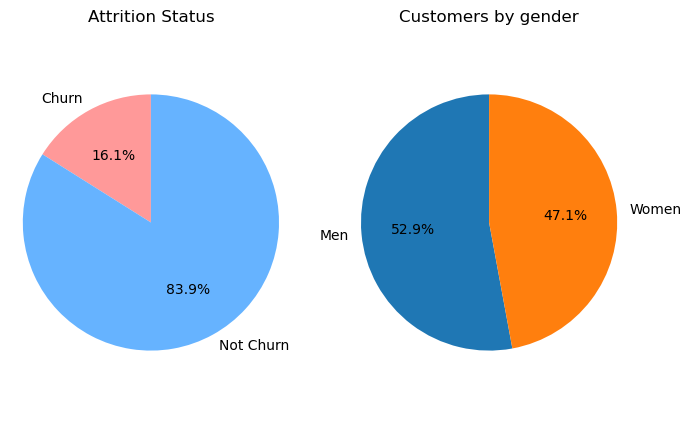

In [107]:
# exploring the attrition_flag and the gender

labels_attrition = df_card["Attrition_Flag"].unique()
sizes_attrition = df_card.groupby("Attrition_Flag").size().values

labels_gender = df_card["Gender"].unique()
sizes_gender = df_card.groupby("Gender").size().values

labels_attrition = ["Churn", "Not Churn"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ax1.pie(
    sizes_attrition,
    labels=labels_attrition,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#ff9999", "#66b3ff"],
)
ax1.axis("equal")
ax1.set_title("Attrition Status")

labels_gender = ["Men", "Women"]

ax2.pie(sizes_gender, labels=labels_gender, autopct="%1.1f%%", startangle=90)
ax2.axis("equal")
ax2.set_title("Customers by gender")

plt.show()

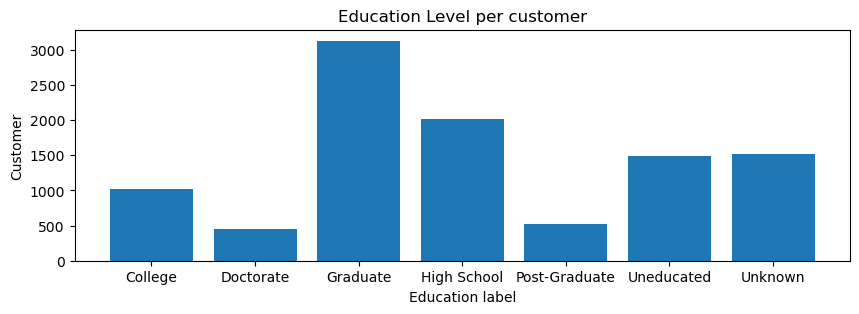

In [108]:
# exploring the Education_Level

plt.figure(figsize=(10, 3))
fig = plt.subplot()

education_info = df_card["Education_Level"].value_counts().sort_index()
education_level = education_info.index
education_count = education_info.values

fig.bar(education_level, education_count)
plt.xlabel("Education label")
plt.ylabel("Customer")
plt.title("Education Level per customer")
plt.show()

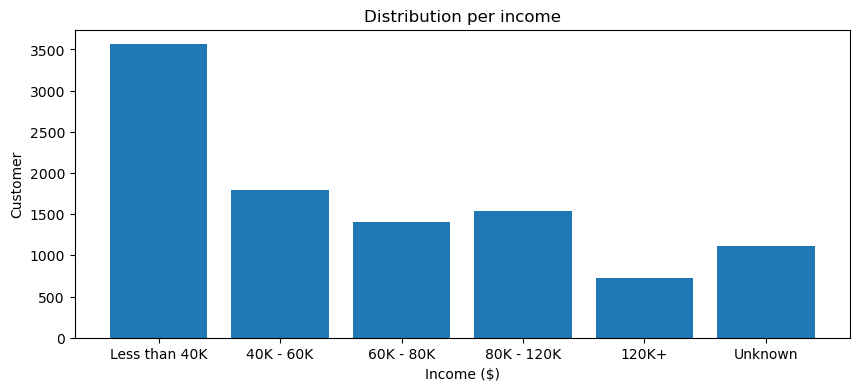

In [109]:
# exploring the Income_Category

plt.figure(figsize=(10, 4))
fig = plt.subplot()

income_order = [
    "Less than $40K",
    "$40K - $60K",
    "$60K - $80K",
    "$80K - $120K",
    "$120K +",
    "Unknown",
]
income_info = (
    df_card["Income_Category"].value_counts().sort_index().reindex(income_order)
)

income_count = income_info.values

custom_labels = [
    "Less than 40K",
    "40K - 60K",
    "60K - 80K",
    "80K - 120K",
    "120K+",
    "Unknown",
]

fig.bar(custom_labels, income_count)
plt.xlabel("Income ($)")
plt.ylabel("Customer")
plt.title("Distribution per income")
plt.show()

<Axes: xlabel='Customer_Age'>

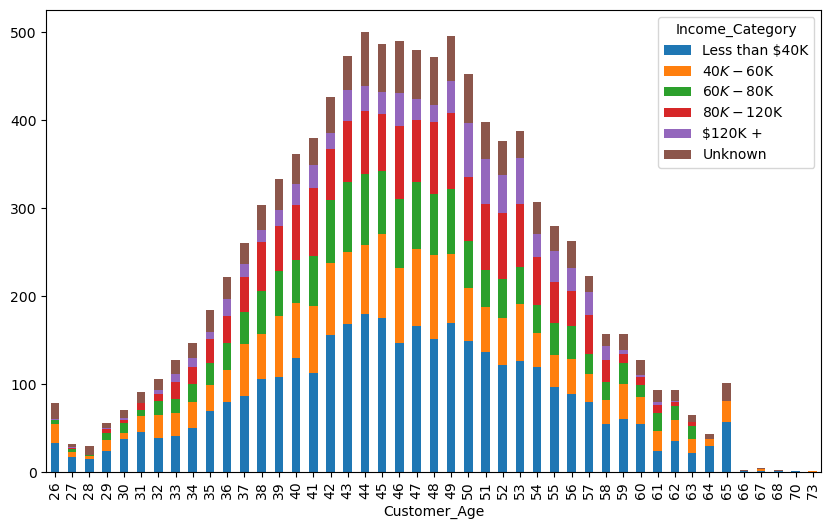

In [110]:
# exploring the Income_Category based on the ages

df_card["Income_Category"] = pd.Categorical(
    df_card["Income_Category"], categories=income_order, ordered=True
)
df_crosstab = pd.crosstab(df_card["Customer_Age"], df_card["Income_Category"])
df_crosstab.plot(kind="bar", stacked=True, figsize=(10, 6))

<Axes: xlabel='Customer_Age'>

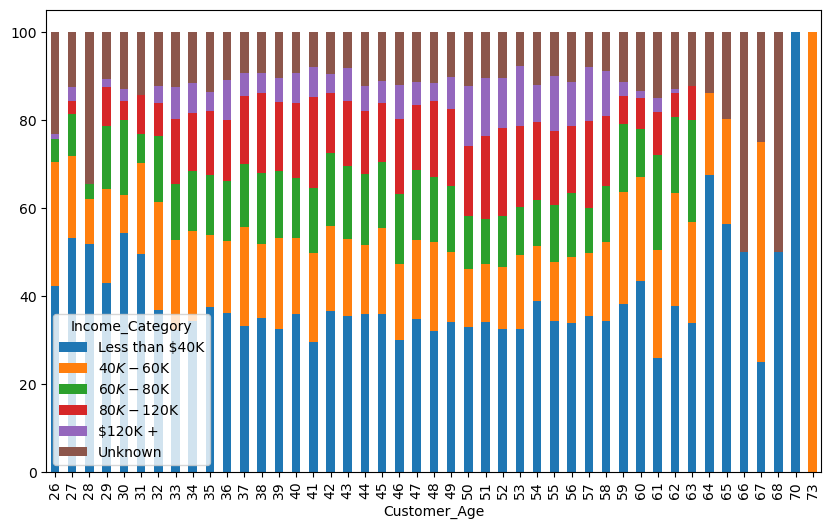

In [111]:
# exploring the Income_Category based on the ages with a staked bar 100%

df_crosstab_percentage = df_crosstab.div(df_crosstab.sum(axis=1), axis=0) * 100
df_crosstab_percentage.plot(kind="bar", stacked=True, figsize=(10, 6))

/var/folders/58/ycxpxvj955n3m62pmd2q7sn40000gn/T/ipykernel_37365/130697433.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


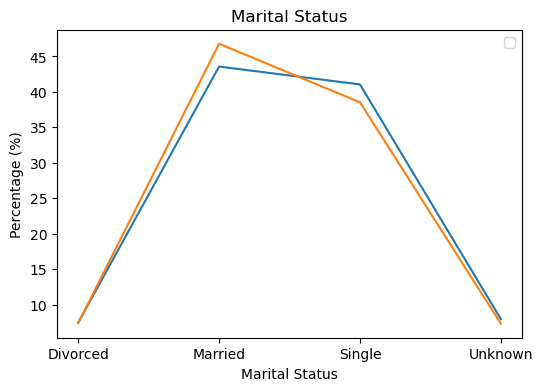

In [112]:
# exploring the Marital_Status

marital_status_churned = (
    df_card[df_card["Attrition_Flag"] == 0]
    .groupby("Marital_Status")
    .size()
    .reset_index(name="marital_status_churned")
)
marital_status_unchurned = (
    df_card[df_card["Attrition_Flag"] == 1]
    .groupby("Marital_Status")
    .size()
    .reset_index(name="marital_status_unchurned")
)

total_churned = marital_status_churned["marital_status_churned"].sum()
total_unchurned = marital_status_unchurned["marital_status_unchurned"].sum()

marital_status_churned["marital_status_churned"] = (
    marital_status_churned["marital_status_churned"] / total_churned
) * 100
marital_status_unchurned["marital_status_unchurned"] = (
    marital_status_unchurned["marital_status_unchurned"] / total_unchurned
) * 100


pd_target = pd.merge(marital_status_churned, marital_status_unchurned)

fig = plt.figure(figsize=(6, 4))
plt.plot(pd_target["Marital_Status"], pd_target["marital_status_churned"])
plt.plot(pd_target["Marital_Status"], pd_target["marital_status_unchurned"])

plt.xlabel("Marital Status")
plt.ylabel("Percentage (%)")
plt.title("Marital Status")
plt.legend()
plt.show()

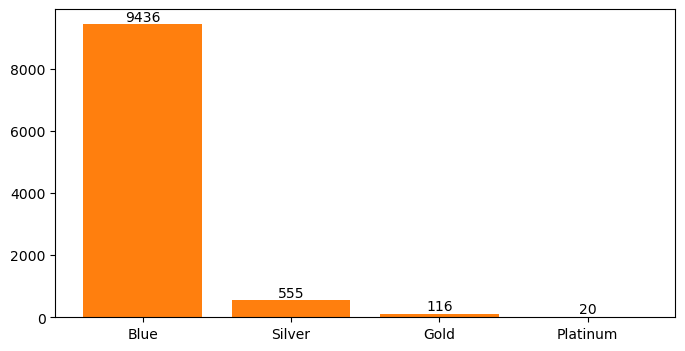

In [113]:
# exploring the Card_Category

plt.figure(figsize=(8, 4))
fig = plt.subplot()

new_order = ["Blue", "Silver", "Gold", "Platinum"]
card_info = df_card["Card_Category"].value_counts().sort_index().reindex(new_order)
card_cat = card_info.index
card_count = card_info.values

bars = plt.bar(card_cat, card_count)
plt.bar(card_cat, card_count)
plt.bar_label(container=bars)
plt.show()

There is no straightforward data to classify the users. For Customer_Age and Marital_Status, the distribution appears to be similar between classes, while for Education_Level and Income_Category, there is too much unknown data. Let’s now explore the numerical data

### EDA for numeric data

In [114]:
df_card_num = df_card.iloc[:, -11:]
df_card_num.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [115]:
TableReport(df_card_num)

Processing column  11 / 11


<TableReport: use .open() to display>

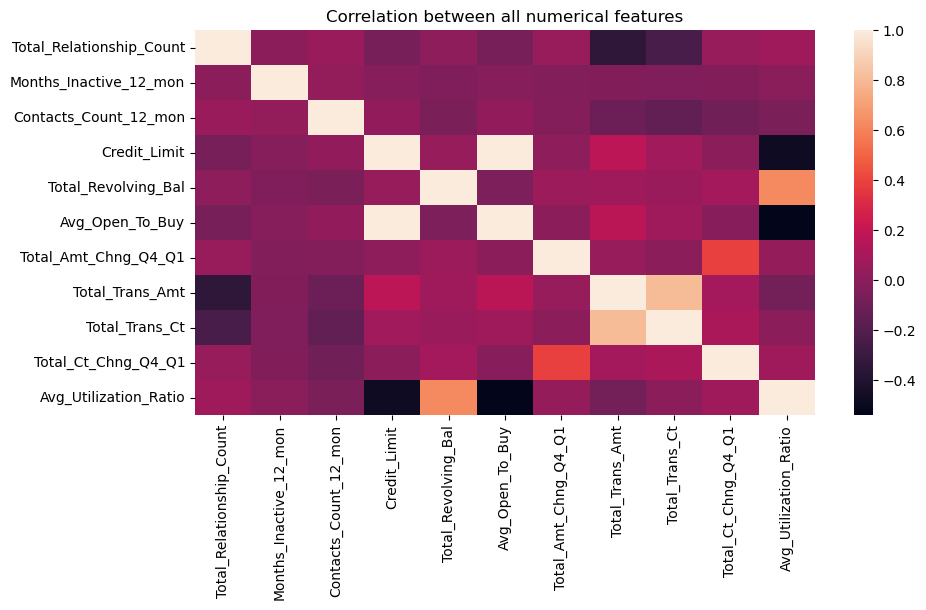

In [116]:
heat = df_card_num.corr()
plt.figure(figsize=[10, 5])
plt.title("Correlation between all numerical features")
sns.heatmap(heat)
plt.show()

# Some features appear to have a higher correlation with each other. For example:
# Total_Trans_Amt and Total_Trans_Ct have a noticeable positive correlation.
# Total_Relationship_Count and Months_Inactive_12_mon also show some correlation.

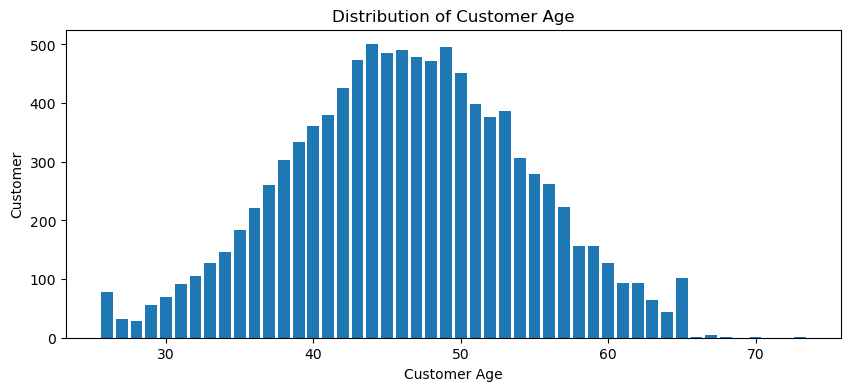

In [117]:
# exploring the Customer_age

plt.figure(figsize=(10, 4))
fig = plt.subplot()

age_info = df_card["Customer_Age"].value_counts().sort_index()
age_cat = age_info.index
age_count = age_info.values

fig.bar(age_cat, age_count)
plt.xlabel("Customer Age")
plt.ylabel("Customer")
plt.title("Distribution of Customer Age")
plt.show()

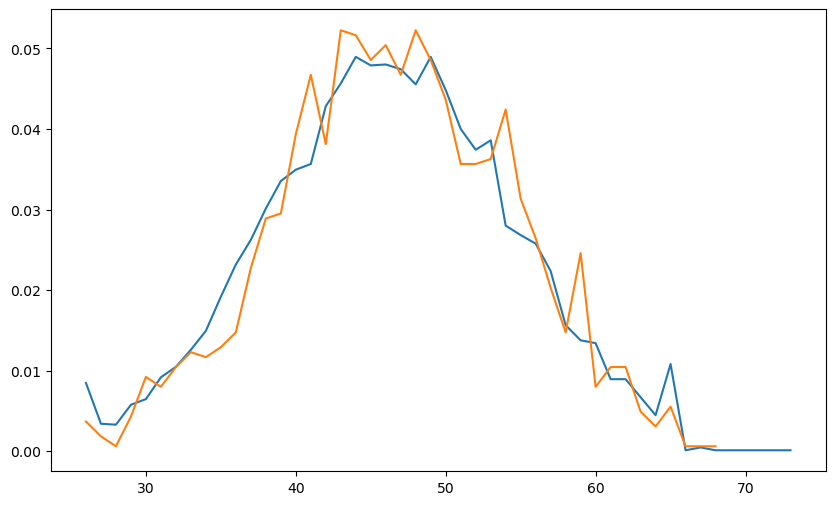

In [118]:
# comparison between churned profile and non churned profile on the Age

df_card_churned = df_card[df_card["Attrition_Flag"] == 1]
df_card_unchurned = df_card[df_card["Attrition_Flag"] == 0]

churned_age_info = (
    df_card_churned["Customer_Age"].value_counts(normalize=True).sort_index()
)
churned_age_cat = churned_age_info.index
churned_age_count = churned_age_info.values

unchurned_age_info = (
    df_card_unchurned["Customer_Age"].value_counts(normalize=True).sort_index()
)
unchurned_age_cat = unchurned_age_info.index
unchurned_age_count = unchurned_age_info.values

fig = plt.figure(figsize=(10, 6))
plt.plot(churned_age_cat, churned_age_count)
plt.plot(unchurned_age_cat, unchurned_age_count)

In [119]:
df_card_num["Attrition_Flag"] = df_card["Attrition_Flag"]
df_card_num_churned = df_card_num[df_card_num["Attrition_Flag"] == 0]
df_card_num_unchurned = df_card_num[df_card_num["Attrition_Flag"] == 1]

column_target = df_card_num.columns

array_col = []
array_churned = []
array_unchurned = []

for col in column_target:
    array_col.append(col)
    array_churned.append(df_card_num_churned[col].mean())
    array_unchurned.append(df_card_num_unchurned[col].mean())

df_target = pd.DataFrame(
    {"measure": array_col, "churned": array_churned, "unchurned": array_unchurned}
)
df_target.drop(df_target.tail(1).index, inplace=True)
df_target

,measure,churned,unchurned
0,Total_Relationship_Count,3.279656,3.914588
1,Months_Inactive_12_mon,2.693301,2.273765
2,Contacts_Count_12_mon,2.972342,2.356353
3,Credit_Limit,8136.039459,8726.877518
4,Total_Revolving_Bal,672.822987,1256.604118
5,Avg_Open_To_Buy,7463.216472,7470.273400
6,Total_Amt_Chng_Q4_Q1,0.694277,0.772510
7,Total_Trans_Amt,3095.025814,4654.655882
8,Total_Trans_Ct,44.933620,68.672588
9,Total_Ct_Chng_Q4_Q1,0.554386,0.742434


<function matplotlib.pyplot.show(close=None, block=None)>

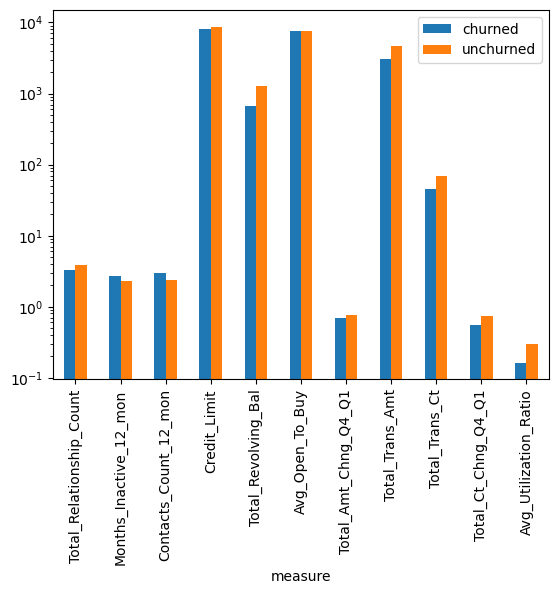

In [120]:
ax = df_target.plot(x="measure", y=["churned", "unchurned"], kind="bar")
ax.set_yscale("log")
plt.show

There are significant differences in certain parameters between churn and non-churn customers, which suggests that our model should achieve a high accuracy score!

## Create the dataset for machine learning application

Because of the unknown data, we will drop the Education_Level and the Income_Category data

In [121]:
# Define categorical and numerical columns
cat_columns = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]
num_columns = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# Split the dataset
X = df_card.drop(columns=["Attrition_Flag", "CLIENTNUM"])
y = df_card["Attrition_Flag"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Preprocessing the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_columns),
    ]
)

In [122]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(kernel="rbf"),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
}

In [123]:
results = {}

for i, model in models.items():

    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[i] = accuracy
    print(f"{i}: Accuracy = {accuracy:.2f}")

Logistic Regression: Accuracy = 0.90
Random Forest: Accuracy = 0.96
Gradient Boosting: Accuracy = 0.96
Support Vector Machine: Accuracy = 0.93
k-Nearest Neighbors: Accuracy = 0.91
Decision Tree: Accuracy = 0.93


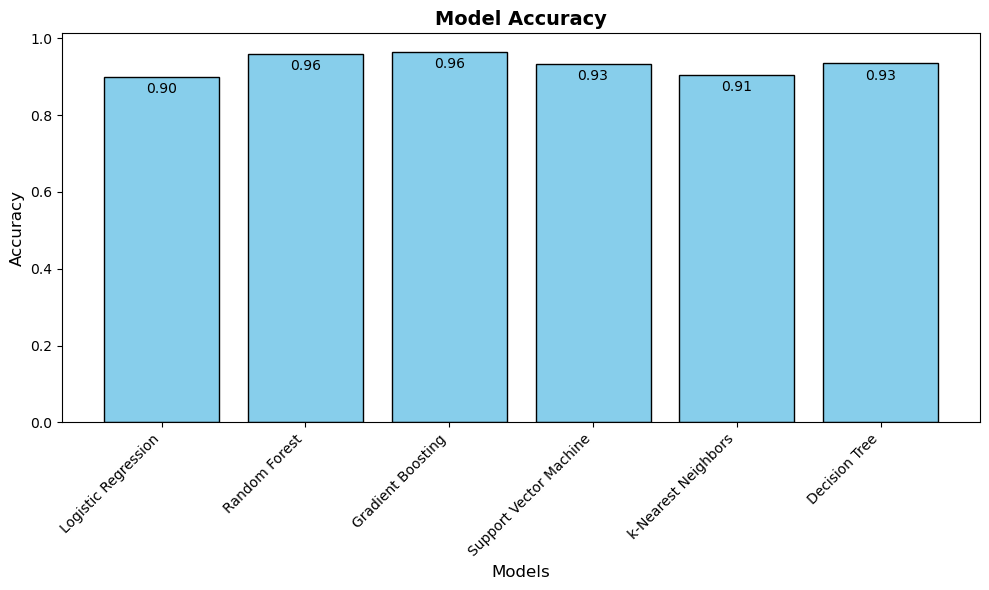

In [124]:
# Create a plot to show the result

model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color="skyblue", edgecolor="black")

for bar, acc in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 0.05,
        f"{acc:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Model Accuracy", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [125]:
# using the Gradient Boosting due to their best rate

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classifier",
            GradientBoostingClassifier(
                n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
            ),
        ),
    ]
)

In [126]:
# Create the pipeline

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [127]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9644619940769991
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.88       496
           1       0.97      0.99      0.98      2543

    accuracy                           0.96      3039
   macro avg       0.95      0.91      0.93      3039
weighted avg       0.96      0.96      0.96      3039



In [128]:
# Testing different param for the model with GridSearchCV

param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [10, 20, None],
}

gs = GridSearchCV(
    estimator=pipeline, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1
)
gs.fit(X_train, y_train)

print("Best parameters found: ", gs.best_params_)

Best parameters found:  {'classifier__learning_rate': 0.2, 'classifier__max_depth': 10, 'classifier__n_estimators': 200}


In [129]:
# Use the best model from GridSearchCV
best_pipeline = gs.best_estimator_

# Predict the test set
y_pred = best_pipeline.predict(X_test)

In [130]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[ 428   68]
 [  38 2505]]


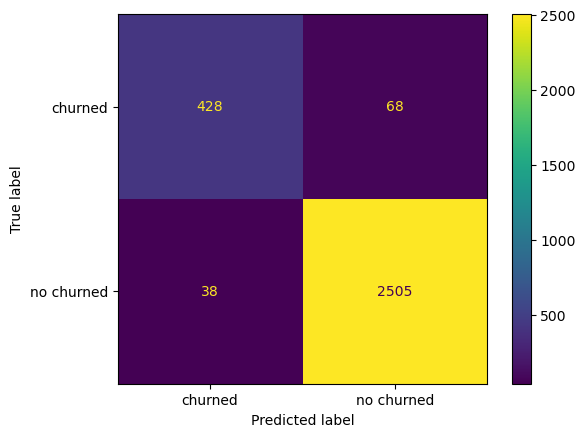

In [131]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["churned", "no churned"]
)
cm_display.plot()
plt.show()

The matrix have yielded insights into the capabilities of the ML model developped. It indicates the following performance metrics:

1. True Positives (TP): 428 customers were correctly predicted as "churned."

2. True Negatives (TN): 2505 customers were correctly identified as "not churned."

3. False Positives (FP): 68 customers were incorrectly predicted to churn when they did not.

4. False Negatives (FN): 38 customers were incorrectly predicted as not churning when they actually did.